<a href="https://colab.research.google.com/github/neworderby/airbyte_lab/blob/main/Real_Estate_Regression_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kaggle: Прогнозирование цены на недвижимость в Мельбурне

##Описание датасета

https://www.kaggle.com/competitions/leopard-challenge-regression/overview

Предсказание модели будет оцениваться по MAPE (mean absolute Percentage error) – средняя абсолютная ошибка в процентах.

Это данные о ценах на недвижимость в Мельбурне. Каждая строчка – это объект недвижимости, по которому известны некоторые параметры и его цена. Задача заключается в том, чтобы по этим параметрам определить цену объекта.

Описание столбцов (параметров объекта):
* Suburb – Район
* Address – адрес
* Rooms – количество комнат
* Type – тип объекта
**    br - bedroom(s);
**    h - house,cottage,villa, semi,terrace;
**    u - unit, duplex;
**    t - townhouse;
**    dev site - development site;
**    o res - other residential.
* Price – цена объекта
* Method – метод продажи объекта:
**    S - property sold;
**    SP - property sold prior;
**    PI - property passed in;
**    PN - sold prior not disclosed;
**    SN - sold not disclosed;
**    NB - no bid;
**    VB - vendor bid;
**    W - withdrawn prior to auction;
**    SA - sold after auction;
**    SS - sold after auction price not disclosed.
**    N/A - price or highest bid not available.
* SellerG – имя риэлтора
* Date – дата продажи объекта
* Distance – расстояние до центрального района в километрах
* Postcode – почтовый индекс
* Bedrooms2 – количество спален
* Bathroom – количество ванных комнат
* Car – количество парковочных мест
* Landsize – площадь прилегающей территории
* BuildingArea – площадь самого объекта
* YearBuilt – год постройки
* CouncilArea – округ
* Lattitude – широта
* Longtitude – долгота
* Regionname – еще одно административное деление на подобие округа
* Propertycount – не совсем ясно что, возможно количество объектов в округе
* id – id объекта

Файлы
* train.csv - выборка для обучения и валидации модели
* test.csv - выборка, на которой нужно предсказать цены и загрузить на Кагл
* sample_submission.csv - пример сабмишшена (файла, который загружать на Кагл) в правильном формате

##Прогнозирование цены на недвижимость

Содержание:
* Загрузка данных
* EDA
* Построение модели
* Обучение модели
* Проверка модели
* Формирование submission

### Загрузка данных

https://drive.google.com/file/d/1n6_97YmN3S7WVOKvpGHPds-B84gFm636/view?usp=share_link

In [ ]:
!gdown --id 1n6_97YmN3S7WVOKvpGHPds-B84gFm636

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1n6_97YmN3S7WVOKvpGHPds-B84gFm636
To: /content/estate_regression.zip
100% 1.00M/1.00M [00:00<00:00, 79.3MB/s]


In [ ]:
! unzip /content/estate_regression.zip #-d /content/estate_regression.zip

Archive:  /content/estate_regression.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


**Импорт библиотек:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('dark_background')

In [ ]:
df = pd.read_csv('/content/train.csv',encoding='cp1251')

### EDA

#### Описательный анализ

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,34302
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,33247
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,31886
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,18999
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,16809


In [ ]:
len(df)

18373

In [ ]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,id
count,18373.000000,1.837300e+04,18373.000000,18373.000000,14905.000000,14903.000000,14798.000000,13579.000000,7750.000000,8944.000000,15041.000000,15041.000000,18372.000000,18373.000000
mean,2.936592,1.053235e+06,10.403962,3107.258314,2.914928,1.538683,1.617313,558.937403,151.133167,1965.925089,-37.809872,144.996486,7518.621489,17490.731889
std,0.955952,6.217973e+05,6.018424,95.285542,0.962743,0.688374,0.957072,3991.516323,519.517626,36.958956,0.081272,0.106536,4487.143499,10075.864589
min,1.000000,2.270000e+05,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000,2.000000
25%,2.000000,6.350000e+05,6.300000,3046.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1950.000000,-37.858180,144.931400,4294.000000,8749.000000
50%,3.000000,8.800000e+05,9.700000,3085.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.803600,145.001100,6567.000000,17497.000000
75%,3.000000,1.301000e+06,13.300000,3149.000000,3.000000,2.000000,2.000000,651.000000,173.862500,2000.000000,-37.756100,145.060190,10331.000000,26286.000000
max,12.000000,5.580000e+06,48.100000,3978.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000,34856.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18373 entries, 0 to 18372
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         18373 non-null  object 
 1   Address        18373 non-null  object 
 2   Rooms          18373 non-null  int64  
 3   Type           18373 non-null  object 
 4   Price          18373 non-null  float64
 5   Method         18373 non-null  object 
 6   SellerG        18373 non-null  object 
 7   Date           18373 non-null  object 
 8   Distance       18373 non-null  float64
 9   Postcode       18373 non-null  float64
 10  Bedroom2       14905 non-null  float64
 11  Bathroom       14903 non-null  float64
 12  Car            14798 non-null  float64
 13  Landsize       13579 non-null  float64
 14  BuildingArea   7750 non-null   float64
 15  YearBuilt      8944 non-null   float64
 16  CouncilArea    18372 non-null  object 
 17  Lattitude      15041 non-null  float64
 18  Longti

Возможный перечень категориальных фичей:

In [ ]:
df.select_dtypes(object).applymap(type).apply(set)

Suburb                          {<class 'str'>}
Address                         {<class 'str'>}
Type                            {<class 'str'>}
Method                          {<class 'str'>}
SellerG                         {<class 'str'>}
Date                            {<class 'str'>}
CouncilArea    {<class 'float'>, <class 'str'>}
Regionname     {<class 'float'>, <class 'str'>}
dtype: object

In [ ]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'id'],
      dtype='object')

In [ ]:
df.isna().mean().sort_values(ascending=False)

BuildingArea     0.578185
YearBuilt        0.513199
Landsize         0.260926
Car              0.194579
Bathroom         0.188864
Bedroom2         0.188755
Longtitude       0.181353
Lattitude        0.181353
Propertycount    0.000054
Regionname       0.000054
CouncilArea      0.000054
Suburb           0.000000
Address          0.000000
Postcode         0.000000
Distance         0.000000
Date             0.000000
SellerG          0.000000
Method           0.000000
Price            0.000000
Type             0.000000
Rooms            0.000000
id               0.000000
dtype: float64

In [ ]:
df.isna().mean().sort_values(ascending=False)

BuildingArea     0.578185
YearBuilt        0.513199
Landsize         0.260926
Car              0.194579
Bathroom         0.188864
Bedroom2         0.188755
Longtitude       0.181353
Lattitude        0.181353
Propertycount    0.000054
Regionname       0.000054
CouncilArea      0.000054
Suburb           0.000000
Address          0.000000
Postcode         0.000000
Distance         0.000000
Date             0.000000
SellerG          0.000000
Method           0.000000
Price            0.000000
Type             0.000000
Rooms            0.000000
id               0.000000
dtype: float64

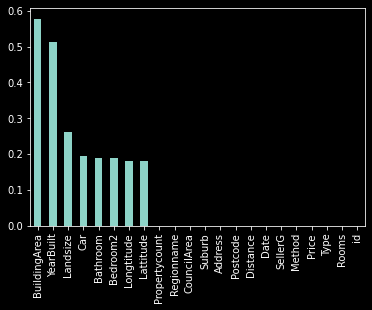

In [ ]:
df.isna().mean().sort_values(ascending=False).plot(kind='bar')

**Предварительные выводы по пропускам:**

Самое большое количество пропусков по столбцу площадь здания, год постройки и придомовая территория. Из этих столбцов полезной фичей для модели может быть год постройки дома.

Наличие парковочных мест, а также сведения о количестве ванных комнат и спален также являются важными признаками для модели.


Широта и долгота не являются важными признаками для модели.

#### Построение сводных таблиц и визуализация. Формирование гипотез

In [ ]:
#t.columns = ['_'.join(col).strip() for col in t.columns.values]
#t.reset_index() - мультииндекс

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,34302
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,33247
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,31886
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,18999
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,16809


In [ ]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'id'],
      dtype='object')

Признаки, которые проверю в первую очередь: Suburb, Rooms, Type, Method,
       Date, Bedroom2, Bathroom, Car,
       Regionname

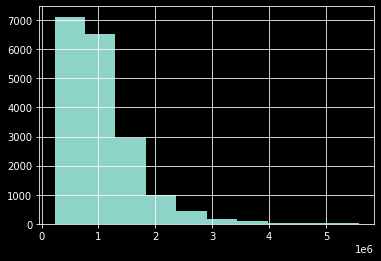

In [ ]:
df['Price'].hist()

In [ ]:
df['Price'].mean()

1053234.8822184727

На гистограмме видим, что наибольшее количество записей в таблице имеют стоимость недвижимости <=1 000 000. Также у распределения "длинный хвост". Построим гистограмму на 95% выборки:

In [ ]:
q = df['Price'].quantile(0.95) #квантиль

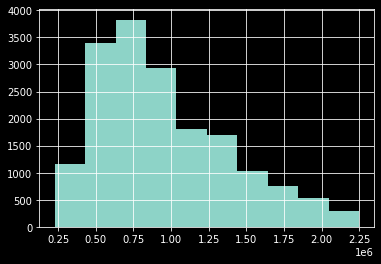

In [ ]:
df['Price'][df['Price']<q].hist()

В 95% выборке можно увидеть, что наибольшее количество лотов представлено со стоимостью порядка 800 000

Карта объектов недвижимости:

In [ ]:
color_scale = [(0, 'orange'), (1,'red')]
fig = px.scatter_mapbox(df,
                        lat="Lattitude",
                        lon="Longtitude",
                        hover_name="Suburb",
                        hover_data=["Suburb", "Price"],
                        color="Price",
                        color_continuous_scale=color_scale,
                        size="Price",
                        zoom=8,
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


Тепловая карта объектов недвижимости не дала однозначных выводов в части зависимости цены объекта от района, т.к. во всех районах можно увидеть красные очаги. Визуально их количество больше на побережье(Hampton, Brighton) и в центре (Armadale, Kew). Однозначно можно судить о том, что в пригороде стоимость жилья дешевле.

Топ районов, округов, пригородов:

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
df.groupby('Suburb')['Price'].agg(['count','mean']).sort_values(by='mean',ascending=False).head(10)

,count,mean
Suburb,,
Canterbury,66,2165386.36
Albert Park,76,1924388.16
Malvern,92,1903271.74
Brighton,246,1880916.41
Middle Park,39,1875461.54
Camberwell,200,1853581.00
Balwyn,170,1824173.53
Ivanhoe East,34,1789588.24
Kew,243,1761491.77


Завернем в функцию, которая группирует таблицу по разным атрибутам:

In [ ]:
def group_table2(how,what):
  x = df.groupby(how)[what].agg(['count','mean']).sort_values(by='mean',ascending=False)
  return x

In [ ]:
group_table2('Regionname','Price')

,count,mean
Regionname,,
Southern Metropolitan,6326,1356456.78
Eastern Metropolitan,1999,1100020.38
South-Eastern Metropolitan,683,877998.30
Northern Metropolitan,5305,863579.30
Western Metropolitan,3875,846332.87
Eastern Victoria,79,701632.68
Northern Victoria,63,603253.97
Western Victoria,42,394125.00


In [ ]:
group_table2('CouncilArea','Price').head(10)

,count,mean
CouncilArea,,
Boroondara City Council,1896,1634107.30
Bayside City Council,857,1574317.66
Stonnington City Council,674,1479288.51
Manningham City Council,558,1207637.81
Monash City Council,640,1165748.95
Whitehorse City Council,237,1144218.14
Port Phillip City Council,729,1118161.93
Glen Eira City Council,1251,1092423.72
Yarra City Council,683,1089793.21


Выделим округа:

In [ ]:
t = df.groupby('Suburb')[['Lattitude','Longtitude']].agg(['max','min'])

In [ ]:
t.columns = ['_'.join(col).strip() for col in t.columns.values]
t = t.reset_index()
t

,Suburb,Lattitude_max,Lattitude_min,Longtitude_max,Longtitude_min
0,Abbotsford,-37.80,-37.81,145.01,144.99
1,Aberfeldie,-37.75,-37.76,144.91,144.89
2,Airport West,-37.72,-37.73,144.89,144.87
3,Albanvale,-37.74,-37.75,144.78,144.77
4,Albert Park,-37.84,-37.85,144.96,144.94
...,...,...,...,...,...
324,Wyndham Vale,-37.87,-37.90,144.63,144.60
325,Yallambie,-37.72,-37.73,145.11,145.08
326,Yarra Glen,-37.65,-37.65,145.37,145.37
327,Yarraville,-37.81,-37.82,144.90,144.86


In [ ]:
t2 = df.groupby('Suburb')[['Price']].mean()

In [ ]:
t2 = t2.merge(t,how='left',on='Suburb')
t2

,Suburb,Price,Lattitude_max,Lattitude_min,Longtitude_max,Longtitude_min
0,Abbotsford,1026500.00,-37.80,-37.81,145.01,144.99
1,Aberfeldie,1266047.17,-37.75,-37.76,144.91,144.89
2,Airport West,737177.58,-37.72,-37.73,144.89,144.87
3,Albanvale,533062.50,-37.74,-37.75,144.78,144.77
4,Albert Park,1924388.16,-37.84,-37.85,144.96,144.94
...,...,...,...,...,...,...
324,Wyndham Vale,520328.57,-37.87,-37.90,144.63,144.60
325,Yallambie,827587.84,-37.72,-37.73,145.11,145.08
326,Yarra Glen,620000.00,-37.65,-37.65,145.37,145.37
327,Yarraville,967279.70,-37.81,-37.82,144.90,144.86


Карта по районам:

In [ ]:
color_scale = [(0, 'orange'), (1,'red')]
fig = px.scatter_mapbox(t2,
                        lat="Lattitude_max",
                        lon="Longtitude_max",
                        hover_name="Suburb",
                        hover_data=["Suburb", "Price"],
                        color="Price",
                        color_continuous_scale=color_scale,
                        size="Price",
                        zoom=8,
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Далее для поиска взаимосвязей между ценой объекта и переменными будет использован phik:

In [ ]:
! pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 690 kB 24.0 MB/s 


In [ ]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'id'],
      dtype='object')

In [ ]:
df2 = df[['Suburb','Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount']]

In [ ]:
phik_overview = df2.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']


,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Suburb,1.00,0.49,0.58,0.61,0.32,0.98,0.43,1.00,1.00,0.52,0.44,0.49,0.75,0.74,0.54,1.00,1.00,1.00,1.00,1.00
Rooms,0.49,1.00,0.59,0.55,0.13,0.62,0.14,0.36,0.12,0.89,0.53,0.39,0.00,0.04,0.09,0.37,0.16,0.23,0.20,0.19
Type,0.58,0.59,1.00,0.50,0.09,0.41,0.16,0.31,0.17,0.43,0.45,0.45,0.00,0.00,0.53,0.48,0.25,0.24,0.23,0.24
Price,0.61,0.55,0.50,1.00,0.17,0.48,0.14,0.23,0.28,0.35,0.40,0.38,0.05,0.00,0.44,0.51,0.37,0.35,0.32,0.26
Method,0.32,0.13,0.09,0.17,1.00,0.33,0.12,0.17,0.11,0.09,0.11,0.06,0.02,0.00,0.02,0.24,0.14,0.16,0.13,0.11
SellerG,0.98,0.62,0.41,0.48,0.33,1.00,0.41,0.81,0.83,0.22,0.39,0.29,0.00,0.00,0.42,0.94,0.83,0.85,0.85,0.65
Date,0.43,0.14,0.16,0.14,0.12,0.41,1.00,0.41,0.18,0.17,0.18,0.19,0.00,0.38,0.22,0.37,0.30,0.33,0.29,0.16
Distance,1.00,0.36,0.31,0.23,0.17,0.81,0.41,1.00,0.73,0.22,0.15,0.39,0.17,0.31,0.38,0.93,0.89,0.83,0.71,0.59
Postcode,1.00,0.12,0.17,0.28,0.11,0.83,0.18,0.73,1.00,0.10,0.13,0.12,0.13,0.18,0.10,0.92,0.74,0.76,0.91,0.41
Bedroom2,0.52,0.89,0.43,0.35,0.09,0.22,0.17,0.22,0.10,1.00,0.56,0.33,0.00,0.00,0.14,0.31,0.12,0.19,0.15,0.13


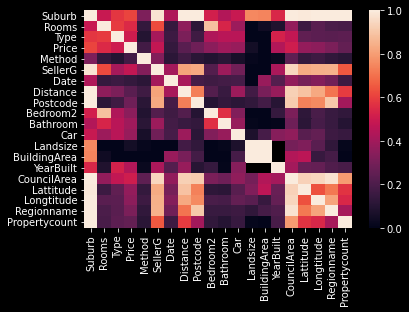

In [ ]:
sns.heatmap(phik_overview)

In [ ]:
phik_overview['Price'].sort_values(ascending=False)

Price           1.00
Suburb          0.61
Rooms           0.55
CouncilArea     0.51
Type            0.50
SellerG         0.48
YearBuilt       0.44
Bathroom        0.40
Car             0.38
Lattitude       0.37
Longtitude      0.35
Bedroom2        0.35
Regionname      0.32
Postcode        0.28
Propertycount   0.26
Distance        0.23
Method          0.17
Date            0.14
Landsize        0.05
BuildingArea    0.00
Name: Price, dtype: float64

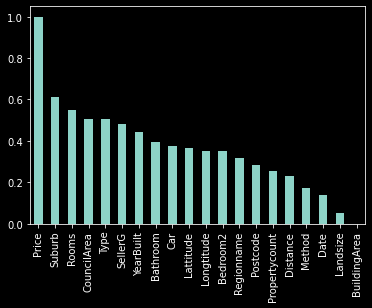

In [ ]:
phik_overview['Price'].sort_values(ascending=False).plot(kind='bar')

Наибольшая взаимосвязь с ключевым признаком наблюдается у Района, Количества комнат, Округа, Типа объекта, Имя риелтера, Года постройки и Количества ванных комнат.

In [ ]:
numb_of_rooms = pd.unique(df['Rooms'])
np.sort(numb_of_rooms, axis=None)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12])

Далее изобразим хитмапы по двум признакам для средней цены объекта:

In [ ]:
def heat_map(in_val, col_val,what='Price',how='mean'):
  t = pd.pivot_table(df, values=what, index=in_val,
                    columns=col_val, aggfunc=how).fillna(0)
  return sns.heatmap(t)

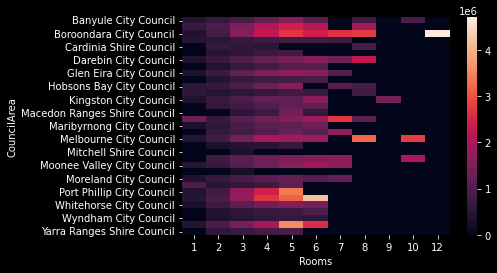

In [ ]:
heat_map('CouncilArea', 'Rooms')

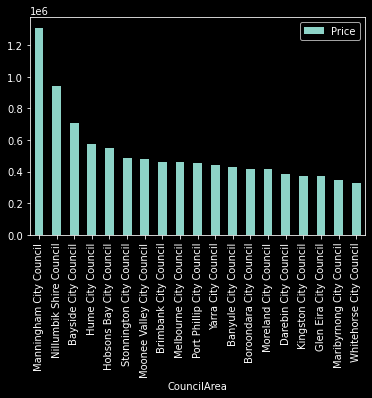

In [ ]:
df[df['Rooms'] == 1].groupby('CouncilArea')[['Price']].mean().sort_values(by = 'Price', ascending=False).plot(kind='bar')

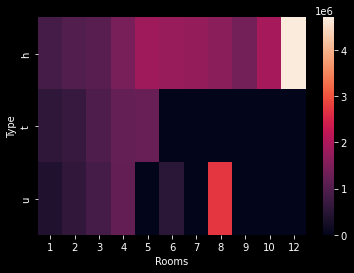

In [ ]:
heat_map('Type', 'Rooms')

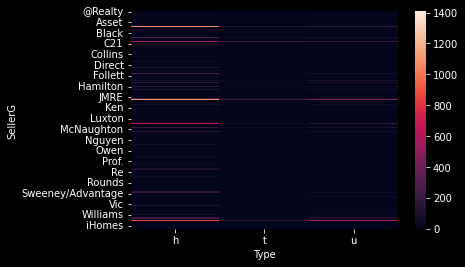

In [ ]:
heat_map('SellerG','Type','id','count')

In [ ]:
df['BuildingArea_q'] = pd.qcut(df['BuildingArea'],5,duplicates='drop')

In [ ]:
df['Rooms_q'] = pd.qcut(df['Rooms'],5,duplicates='drop')

In [ ]:
df['Bedroom2_q'] = pd.qcut(df['Bedroom2'],5,duplicates='drop')

In [ ]:
df['YearBuilt_q'] = pd.qcut(df['YearBuilt'],5,duplicates='drop')

In [ ]:
df['Distance_q'] = pd.qcut(df['Distance'],5,duplicates='drop')

In [ ]:
from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse

In [ ]:
df['Date']

0         3/12/2016
1         4/02/2016
2         4/03/2017
3         4/03/2017
4         4/06/2016
            ...    
18368    30/09/2017
18369    30/09/2017
18370    30/09/2017
18371    30/09/2017
18372    30/09/2017
Name: Date, Length: 18373, dtype: object

In [ ]:
df['Date_2'] = [datetime.strptime(x, '%d/%m/%Y') for x in df['Date']]

In [ ]:
df['Date_q'] = pd.qcut(df['Date_2'],5,duplicates='drop')

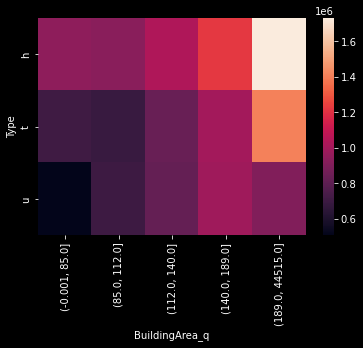

In [ ]:
heat_map('Type', 'BuildingArea_q')

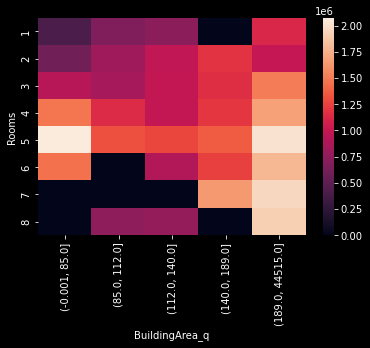

In [ ]:
heat_map('Rooms', 'BuildingArea_q')

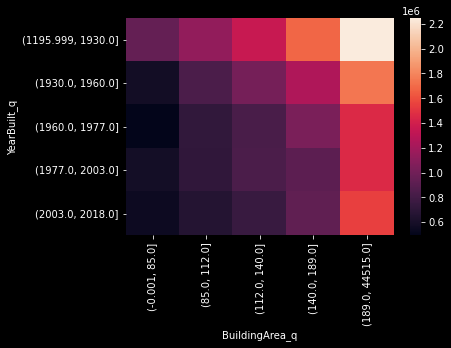

In [ ]:
heat_map('YearBuilt_q', 'BuildingArea_q')

In [ ]:
group_table2('YearBuilt_q','Price')

,count,mean
YearBuilt_q,,
"(1195.999, 1930.0]",1823,1524229.04
"(1930.0, 1960.0]",1964,1047156.13
"(2003.0, 2018.0]",1740,935227.47
"(1977.0, 2003.0]",1837,931584.00
"(1960.0, 1977.0]",1580,762676.97


In [ ]:
(pd.pivot_table(df, values='Price', index=['BuildingArea_q','Type'],
                    columns='YearBuilt_q', aggfunc='mean')
.fillna(0).style.format("{:.1f}").background_gradient(cmap='mako', axis=1))

In [ ]:
(pd.pivot_table(df, values='Price', index=['BuildingArea_q','Type'],
                    columns='Distance_q', aggfunc='mean')
.fillna(0).style.format("{:.1f}").background_gradient(cmap='mako', axis=1))

In [ ]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'id', 'BuildingArea_q',
       'Rooms_q', 'Bedroom2_q', 'YearBuilt_q', 'Distance_q', 'Date_2',
       'Date_q'],
      dtype='object')

In [ ]:
(pd.pivot_table(df, values='Price', index='Type',
                    columns='Method', aggfunc='mean')
.fillna(0).style.format("{:.1f}").background_gradient(cmap='mako', axis=1))

Method,PI,S,SA,SP,VB
Type,,,,,
h,1331873.1,1208952.0,1155069.8,1046341.0,1502875.9
t,932476.6,941807.4,781900.0,826055.8,949235.3
u,576717.8,655094.6,584851.9,566068.8,576104.4


In [ ]:
(pd.pivot_table(df, values='Price', index='Type',
                    columns='Date_q', aggfunc='mean')
.fillna(0).style.format("{:.1f}").background_gradient(cmap='mako', axis=1))

Date_q,"(2016-01-27 23:59:59.999999999, 2016-08-22]","(2016-08-22, 2016-12-03]","(2016-12-03, 2017-05-20]","(2017-05-20, 2017-07-29]","(2017-07-29, 2017-09-30]"
Type,,,,,
h,1236323.1,1318289.8,1338727.3,1083152.1,1190176.4
t,862286.1,912066.8,972218.0,896070.7,985033.6
u,592119.9,606401.5,636344.5,640701.0,644634.1


In [ ]:
(pd.pivot_table(df, values='Price', index='Rooms',
                    columns='Date_q', aggfunc='mean')
.fillna(0).style.format("{:.1f}").background_gradient(cmap='mako', axis=1))

Date_q,"(2016-01-27 23:59:59.999999999, 2016-08-22]","(2016-08-22, 2016-12-03]","(2016-12-03, 2017-05-20]","(2017-05-20, 2017-07-29]","(2017-07-29, 2017-09-30]"
Rooms,,,,,
1,422809.0,444093.4,463232.7,445903.4,428682.2
2,702035.2,763286.8,808033.2,742718.7,767647.0
3,1046826.8,1104557.9,1139003.2,955108.7,1029288.3
4,1483503.7,1585678.7,1618309.7,1211178.5,1333542.8
5,1959580.8,2073752.0,1975341.5,1473605.0,1766676.9
6,1815250.0,2430444.4,1876600.0,1643303.6,1583347.8
7,1802500.0,1285000.0,1130000.0,1899000.0,2146250.0
8,1015500.0,1860000.0,2617500.0,2200000.0,825500.0
9,0.0,1380000.0,0.0,0.0,0.0


*  Количество дорогих лотов больше на побережье (Hampton, Brighton) и в центре (Armadale, Kew). В пригороде стоимость жилья дешевле.
* Хитмэп показал, что цена объекта зависит не только от района, но также от увеличения количества комнат объекта недвижимости.
* Также хитмэп показал, что самые дорогие лоты находятся в категории House
* Самые дорогие объекты имеют также самую большую площадь
* Примечательно, что чаще риелтеры продают определенный тип недвижимости (видим это по черным областям)
* Распределение цены объекта от площади и количества комнат неравномерно. В целом, с увеличением количества комнат и площади объекта, средняя цена растет, но есть выбросы
* Интересно, что самые дорогие объекты имееют год постройки до 1930 года (исторические здания)
* Абсолютным топом по всем типам жилья является Southern Metropolitan	Western
* Близость к центральному району по всем типам жилья увеличтвает среднюю стоимость объектов
* Чаще более высокую стоимость имеюют объекты, продающиеся по методу VB
* Объекты, с типом h, выставленные весной 2016 года имели самую высокую цену размещения, по остальным типам жилья самая высокая цена размещения была в июле-сентябре 2017
* В целом, жилье с разным типом планировки имело максимальную стоимость размещения в в период с 08.2016 по 05.2017

### Построение модели

Для начала разобью df на train и test. Далее обучусь на всей модели

#### Обзор датасета перед построением модели

Baseline:

In [ ]:
df['Price_base_mean']=df['Price'].mean()

#### Формирование выборок

In [ ]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 119 kB/s 


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
df = pd.read_csv('/content/train.csv')#,encoding='cp1251')

In [ ]:
df['CouncilArea'] = df['CouncilArea'].astype(str)
df['Regionname'] = df['Regionname'].astype(str)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df, train_size = 0.6, random_state = 42)

In [ ]:
val, test = train_test_split(test, train_size = 0.5, random_state = 42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [ ]:
def error(y_true,y_pred):
  print(mean_absolute_error(y_true,y_pred))
  print(mean_absolute_percentage_error(y_true,y_pred))

In [ ]:
train.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'id'],
      dtype='object')

In [ ]:
train.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
id                 int64
dtype: object

In [ ]:
train.isna().mean()

Suburb          0.00
Address         0.00
Rooms           0.00
Type            0.00
Price           0.00
Method          0.00
SellerG         0.00
Date            0.00
Distance        0.00
Postcode        0.00
Bedroom2        0.19
Bathroom        0.19
Car             0.19
Landsize        0.26
BuildingArea    0.57
YearBuilt       0.51
CouncilArea     0.00
Lattitude       0.18
Longtitude      0.18
Regionname      0.00
Propertycount   0.00
id              0.00
dtype: float64

##### Первая итерация с минимальным набором признаков

In [ ]:
X = ['Rooms','Distance','Suburb']

cat_features = ['Suburb']

y = ['Price']

In [ ]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'MAPE',
              'random_seed':42,
              'verbose':100}

In [ ]:
model = CatBoostRegressor(**parameters)

In [ ]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

Learning rate set to 0.074223
0:	learn: 0.5189395	test: 0.5073680	best: 0.5073680 (0)	total: 89.3ms	remaining: 1m 29s
100:	learn: 0.2599546	test: 0.2469660	best: 0.2469660 (100)	total: 652ms	remaining: 5.8s
200:	learn: 0.2497566	test: 0.2402324	best: 0.2402324 (200)	total: 984ms	remaining: 3.91s
300:	learn: 0.2447213	test: 0.2377002	best: 0.2377002 (300)	total: 1.3s	remaining: 3.03s
400:	learn: 0.2413253	test: 0.2364432	best: 0.2363737 (392)	total: 1.61s	remaining: 2.4s
500:	learn: 0.2382510	test: 0.2348873	best: 0.2348873 (500)	total: 2.08s	remaining: 2.07s
600:	learn: 0.2358745	test: 0.2342950	best: 0.2341600 (583)	total: 2.38s	remaining: 1.58s
700:	learn: 0.2337596	test: 0.2335838	best: 0.2335838 (700)	total: 2.69s	remaining: 1.15s
800:	learn: 0.2319629	test: 0.2331377	best: 0.2330898 (792)	total: 3.07s	remaining: 762ms
900:	learn: 0.2303933	test: 0.2328410	best: 0.2326652 (872)	total: 3.37s	remaining: 370ms
999:	learn: 0.2292194	test: 0.2327817	best: 0.2326652 (872)	total: 3.67s	re

In [ ]:
model.predict(test[X])

array([1027293.73531587,  439846.92493805,  919671.08018548, ...,
       1550548.49455295, 1978015.68815834, 1101367.7530815 ])

In [ ]:
test['price_pred_min']=model.predict(test[X])

In [ ]:
error(test['Price'],test['price_pred_min'])

232419.51993110962
0.23658693452138924


##### Вторая итерация с расширенным набором признаков

In [ ]:
X = ['Rooms','Distance','Suburb','Type','Method','SellerG']

cat_features = ['Suburb','Type','Method','SellerG']

y = ['Price']

In [ ]:
parameters = {'cat_features': cat_features,
              'learning_rate': 0.08,
              'eval_metric': 'MAPE',
              'random_seed':42,
              'verbose':100}

In [ ]:
model = CatBoostRegressor(**parameters)

In [ ]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 0.5137458	test: 0.5024120	best: 0.5024120 (0)	total: 31.9ms	remaining: 31.9s
100:	learn: 0.2065265	test: 0.1992402	best: 0.1992270 (99)	total: 1.1s	remaining: 9.79s
200:	learn: 0.1975283	test: 0.1944697	best: 0.1944697 (200)	total: 1.79s	remaining: 7.12s
300:	learn: 0.1923393	test: 0.1928548	best: 0.1928404 (298)	total: 2.63s	remaining: 6.1s
400:	learn: 0.1884657	test: 0.1917696	best: 0.1917011 (392)	total: 3.31s	remaining: 4.94s
500:	learn: 0.1851286	test: 0.1908468	best: 0.1908468 (500)	total: 4.4s	remaining: 4.38s
600:	learn: 0.1822641	test: 0.1902483	best: 0.1902483 (600)	total: 5.94s	remaining: 3.95s
700:	learn: 0.1794453	test: 0.1899110	best: 0.1898677 (689)	total: 7.5s	remaining: 3.2s
800:	learn: 0.1769051	test: 0.1895741	best: 0.1895124 (785)	total: 9.59s	remaining: 2.38s
900:	learn: 0.1742668	test: 0.1894969	best: 0.1894923 (899)	total: 11.5s	remaining: 1.27s
999:	learn: 0.1717426	test: 0.1893380	best: 0.1892942 (933)	total: 13.2s	remaining: 0us

bestTest = 0.1892941

In [ ]:
model.predict(test[X])

array([ 812020.40968606,  424815.35542042, 1047718.58199961, ...,
       1713277.28051868, 1752435.30406077, 1253052.01684693])

In [ ]:
test['price_pred_second']=model.predict(test[X])

In [ ]:
error(test['Price'],test['price_pred_second'])

201193.02074307748
0.19292086226383814


##### Третья итерация с расширенным набором признаков

In [ ]:
X = ['Rooms','Distance','Suburb','Type','Method','SellerG','YearBuilt','Bedroom2','Bathroom','Car','BuildingArea','Landsize','Propertycount','CouncilArea','Regionname']

cat_features = ['Suburb','Type','Method','SellerG','CouncilArea','Regionname']

y = ['Price']

In [ ]:
parameters = {'cat_features': cat_features,
              'learning_rate': 0.079,
              'eval_metric': 'MAPE',
              'depth': 8,
              'random_seed':42,
              'verbose':100}

In [ ]:
model = CatBoostRegressor(**parameters)

In [ ]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 0.5070669	test: 0.4956076	best: 0.4956076 (0)	total: 25.9ms	remaining: 25.9s
100:	learn: 0.1690545	test: 0.1705156	best: 0.1705156 (100)	total: 1.99s	remaining: 17.7s
200:	learn: 0.1520355	test: 0.1606550	best: 0.1606550 (200)	total: 4.03s	remaining: 16s
300:	learn: 0.1417607	test: 0.1563263	best: 0.1563263 (300)	total: 6.08s	remaining: 14.1s
400:	learn: 0.1345519	test: 0.1546585	best: 0.1546484 (399)	total: 8.18s	remaining: 12.2s
500:	learn: 0.1289424	test: 0.1537837	best: 0.1537789 (498)	total: 10.3s	remaining: 10.3s
600:	learn: 0.1237105	test: 0.1533154	best: 0.1533082 (599)	total: 12.5s	remaining: 8.28s
700:	learn: 0.1187332	test: 0.1524055	best: 0.1523959 (697)	total: 14.6s	remaining: 6.24s
800:	learn: 0.1139914	test: 0.1517958	best: 0.1517433 (777)	total: 16.8s	remaining: 4.18s
900:	learn: 0.1100397	test: 0.1514452	best: 0.1514409 (892)	total: 18.9s	remaining: 2.08s
999:	learn: 0.1062000	test: 0.1509951	best: 0.1509896 (997)	total: 22.3s	remaining: 0us

bestTest = 0.150

In [ ]:
model.predict(test[X])

array([ 888382.77110792,  385661.98213402,  850280.39357107, ...,
       1200011.28337479, 1630223.84987555, 1109236.81315109])

In [ ]:
test['price_pred_3']=model.predict(test[X])

In [ ]:
error(test['Price'],test['price_pred_3'])

167177.15951857707
0.1580509815632128


##### Четвертая итерация с синтетическими  признаками (feature engineering)

Лучшая итерация

In [ ]:
error(test['Price'],test['price_pred_3'])

166802.45295637162
0.15840760404416512


* Разбить на бины год покупки и год постройки
* Пропуски в данных (no info/median(mean))

Пропуски в данных будут заполнены медианой по типу и району объекта

In [ ]:
df.isna().mean()

Suburb          0.00
Address         0.00
Rooms           0.00
Type            0.00
Price           0.00
Method          0.00
SellerG         0.00
Date            0.00
Distance        0.00
Postcode        0.00
Bedroom2        0.19
Bathroom        0.19
Car             0.19
Landsize        0.26
BuildingArea    0.58
YearBuilt       0.51
CouncilArea     0.00
Lattitude       0.18
Longtitude      0.18
Regionname      0.00
Propertycount   0.00
id              0.00
dtype: float64

In [ ]:
df_bedroom = df.groupby(['Suburb','Type'])['Bedroom2'].median().reset_index()

In [ ]:
df = pd.merge(df,df_bedroom[['Suburb','Type','Bedroom2']],how='left',on=['Suburb','Type'])
df = df.rename(columns={"Bedroom2_y": "Bedroom2_med"})

In [ ]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id,Bedroom2_med
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,34302,3.00
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,33247,3.00
2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,...,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,31886,3.00
3,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,3067.00,...,94.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,18999,3.00
4,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,...,120.00,142.00,2014.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,16809,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18368,Noble Park,5 Blaby St,3,h,627500.00,PI,C21,30/09/2017,22.70,3174.00,...,569.00,130.00,1959.00,Greater Dandenong City Council,-37.97,145.18,South-Eastern Metropolitan,11806.00,8052,3.00
18369,Reservoir,18 Elinda Pl,3,u,475000.00,SP,RW,30/09/2017,12.00,3073.00,...,NaN,105.00,1990.00,Darebin City Council,-37.70,145.02,Northern Metropolitan,21650.00,22511,2.00
18370,Roxburgh Park,14 Stainsby Cr,4,h,591000.00,S,Raine,30/09/2017,20.60,3064.00,...,NaN,225.00,1995.00,Hume City Council,-37.64,144.93,Northern Metropolitan,5833.00,31811,3.00
18371,Springvale South,30 Waddington Cr,3,h,780500.00,S,Harcourts,30/09/2017,22.20,3172.00,...,544.00,NaN,NaN,Greater Dandenong City Council,-37.98,145.15,South-Eastern Metropolitan,4054.00,6855,3.00


In [ ]:
df['Bedroom2_med'].fillna(int(df['Bedroom2_med'].mean()), inplace=True)

In [ ]:
df['Car'].fillna(int(df['Car'].mean()), inplace=True)

In [ ]:
df['BuildingArea'].fillna(int(df['BuildingArea'].median()), inplace=True)

In [ ]:
train, test = train_test_split(df, train_size = 0.6, random_state = 42)

In [ ]:
val, test = train_test_split(test, train_size = 0.5, random_state = 42)

In [ ]:
X = ['Rooms','Distance','Suburb','Type','Method','SellerG','YearBuilt','Bedroom2_med','Bathroom','Car','BuildingArea','Landsize','Propertycount','CouncilArea','Regionname']

cat_features = ['Suburb','Type','Method','SellerG','CouncilArea','Regionname']

y = ['Price']

In [ ]:
parameters = {'cat_features': cat_features,
              'learning_rate': 0.075,
              'eval_metric': 'MAPE',
              'random_seed':42,
              'verbose':100}

In [ ]:
model = CatBoostRegressor(**parameters)

In [ ]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 0.5106415	test: 0.4994820	best: 0.4994820 (0)	total: 14.1ms	remaining: 14.1s
100:	learn: 0.1808117	test: 0.1767352	best: 0.1767352 (100)	total: 1.17s	remaining: 10.4s
200:	learn: 0.1664548	test: 0.1665454	best: 0.1665454 (200)	total: 2.39s	remaining: 9.51s
300:	learn: 0.1572099	test: 0.1611841	best: 0.1611841 (300)	total: 3.57s	remaining: 8.3s
400:	learn: 0.1523617	test: 0.1593870	best: 0.1593870 (400)	total: 4.78s	remaining: 7.14s
500:	learn: 0.1478499	test: 0.1575216	best: 0.1575216 (500)	total: 6.01s	remaining: 5.99s
600:	learn: 0.1446002	test: 0.1564497	best: 0.1564468 (599)	total: 7.26s	remaining: 4.82s
700:	learn: 0.1415179	test: 0.1555807	best: 0.1555332 (679)	total: 8.49s	remaining: 3.62s
800:	learn: 0.1389228	test: 0.1551779	best: 0.1551779 (800)	total: 9.71s	remaining: 2.41s
900:	learn: 0.1362623	test: 0.1546586	best: 0.1546576 (899)	total: 10.9s	remaining: 1.2s
999:	learn: 0.1340494	test: 0.1541742	best: 0.1541570 (990)	total: 12.2s	remaining: 0us

bestTest = 0.154

In [ ]:
model.predict(test[X])

array([ 932505.02923246,  370114.32063874,  903526.18406762, ...,
       1249023.86400175, 1568689.47134904, 1146860.49989227])

In [ ]:
test['price_pred_med']=model.predict(test[X])

In [ ]:
error(test['Price'],test['price_pred_med'])

168188.53938908043
0.16024391676438804


Модель по средним стала хуже

Пятая итерация с бинами

In [ ]:
df = pd.read_csv('/content/train.csv')#,encoding='cp1251')

In [ ]:
df['CouncilArea'] = df['CouncilArea'].astype(str)
df['Regionname'] = df['Regionname'].astype(str)

In [ ]:
df['BuildingArea_q'] = pd.qcut(df['BuildingArea'],5,duplicates='drop').astype(str)

In [ ]:
df['Rooms_q'] = pd.qcut(df['Rooms'],5,duplicates='drop').astype(str)

In [ ]:
df['Bedroom2_q'] = pd.qcut(df['Bedroom2'],5,duplicates='drop').astype(str)

In [ ]:
df['YearBuilt_q'] = pd.qcut(df['YearBuilt'],5,duplicates='drop').astype(str)

In [ ]:
df['Distance_q'] = pd.qcut(df['Distance'],5,duplicates='drop').astype(str)

In [ ]:
train, test = train_test_split(df, train_size = 0.6, random_state = 42)

In [ ]:
val, test = train_test_split(test, train_size = 0.5, random_state = 42)

In [ ]:
X = ['Rooms','Distance','Suburb','Type','Method','SellerG','YearBuilt','Bedroom2','Bathroom','Car','BuildingArea','Landsize','Propertycount','CouncilArea','Regionname','BuildingArea_q'
,'Rooms_q','Bedroom2_q','YearBuilt_q','Distance_q']

cat_features = ['Suburb','Type','Method','SellerG','CouncilArea','Regionname','BuildingArea_q'
,'Rooms_q','Bedroom2_q','YearBuilt_q','Distance_q']

y = ['Price']

In [ ]:
parameters = {'cat_features': cat_features,
              'learning_rate': 0.0795,
              'eval_metric': 'MAPE',
              'depth': 8,
              'random_seed':42,
              'verbose':100}

In [ ]:
model = CatBoostRegressor(**parameters)

In [ ]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 0.5078663	test: 0.4961467	best: 0.4961467 (0)	total: 41.1ms	remaining: 41s
100:	learn: 0.1701699	test: 0.1717914	best: 0.1717914 (100)	total: 4.75s	remaining: 42.3s
200:	learn: 0.1522774	test: 0.1616944	best: 0.1616944 (200)	total: 8.45s	remaining: 33.6s
300:	learn: 0.1420441	test: 0.1583046	best: 0.1582527 (299)	total: 12.3s	remaining: 28.5s
400:	learn: 0.1348718	test: 0.1567958	best: 0.1567958 (400)	total: 16.2s	remaining: 24.3s
500:	learn: 0.1280740	test: 0.1556039	best: 0.1554954 (482)	total: 20.1s	remaining: 20s
600:	learn: 0.1229104	test: 0.1550005	best: 0.1549483 (557)	total: 23.9s	remaining: 15.9s
700:	learn: 0.1181137	test: 0.1544082	best: 0.1543794 (675)	total: 27.9s	remaining: 11.9s
800:	learn: 0.1134286	test: 0.1541503	best: 0.1541210 (798)	total: 31.9s	remaining: 7.93s
900:	learn: 0.1088942	test: 0.1538706	best: 0.1538598 (896)	total: 35.8s	remaining: 3.94s
999:	learn: 0.1050103	test: 0.1537181	best: 0.1536739 (988)	total: 39.8s	remaining: 0us

bestTest = 0.15367

In [ ]:
model.predict(test[X])

array([ 900584.98340193,  362217.47905237,  926430.72742433, ...,
       1181094.60870677, 1583333.20108428, 1131407.65243197])

In [ ]:
test['price_pred_qut']=model.predict(test[X])

In [ ]:
error(test['Price'],test['price_pred_qut'])

168669.8400464667
0.15905003948019658


Весь набор

In [ ]:
df = pd.read_csv('/content/train.csv')#,encoding='cp1251')
df['CouncilArea'] = df['CouncilArea'].astype(str)
df['Regionname'] = df['Regionname'].astype(str)

In [ ]:
train, test = train_test_split(df, train_size = 0.6, random_state = 42)

In [ ]:
X = ['Rooms','Distance','Suburb','Type','Method','SellerG','YearBuilt','Bedroom2','Bathroom','Car','BuildingArea','Landsize','Propertycount','CouncilArea','Regionname']

cat_features = ['Suburb','Type','Method','SellerG','CouncilArea','Regionname']

y = ['Price']

In [ ]:
parameters = {'cat_features': cat_features,
              'learning_rate': 0.0795,
              'eval_metric': 'MAPE',
              'depth': 8,
              'random_seed':42,
              'verbose':100}

In [ ]:
model = CatBoostRegressor(**parameters)

In [ ]:
model.fit(train[X],train[y])

0:	learn: 0.5068815	total: 23.1ms	remaining: 23.1s
100:	learn: 0.1682959	total: 1.98s	remaining: 17.6s
200:	learn: 0.1510825	total: 3.91s	remaining: 15.5s
300:	learn: 0.1414566	total: 5.87s	remaining: 13.6s
400:	learn: 0.1343498	total: 7.88s	remaining: 11.8s
500:	learn: 0.1285788	total: 9.86s	remaining: 9.82s
600:	learn: 0.1230636	total: 11.8s	remaining: 7.86s
700:	learn: 0.1178689	total: 13.8s	remaining: 5.91s
800:	learn: 0.1138315	total: 15.9s	remaining: 3.94s
900:	learn: 0.1095158	total: 17.9s	remaining: 1.97s
999:	learn: 0.1062519	total: 19.9s	remaining: 0us


In [ ]:
model.predict(test[X])

array([1010095.48917693, 1578789.10785232, 1867322.96795126, ...,
        596120.11747891,  447317.88495983,  783589.95509431])

In [ ]:
test['price_pred_all']=model.predict(test[X])

In [ ]:
error(test['Price'],test['price_pred_all'])

165156.81516338792
0.15439737718252775


Обучение теста

In [ ]:
train = pd.read_csv('/content/train.csv',encoding='cp1251')
train['CouncilArea'] = train['CouncilArea'].astype(str)
train['Regionname'] = train['Regionname'].astype(str)

In [ ]:
test = pd.read_csv('/content/test.csv',encoding='cp1251')
test['CouncilArea'] = test['CouncilArea'].astype(str)
test['Regionname'] = test['Regionname'].astype(str)

In [ ]:
X = ['Rooms','Distance','Suburb','Type','Method','SellerG','YearBuilt','Bedroom2','Bathroom','Car','BuildingArea','Landsize','Propertycount','CouncilArea','Regionname']

cat_features = ['Suburb','Type','Method','SellerG','CouncilArea','Regionname']

y = ['Price']

In [ ]:
parameters = {'cat_features': cat_features,
              'learning_rate': 0.0795,
              'eval_metric': 'MAPE',
              'depth': 8,
              'random_seed':42,
              'verbose':100}

In [ ]:
model = CatBoostRegressor(**parameters)

In [ ]:
model.fit(train[X],train[y])

0:	learn: 0.5048401	total: 26.8ms	remaining: 26.8s
100:	learn: 0.1663999	total: 2.79s	remaining: 24.8s
200:	learn: 0.1523994	total: 5.49s	remaining: 21.8s
300:	learn: 0.1445487	total: 8.26s	remaining: 19.2s
400:	learn: 0.1392329	total: 11s	remaining: 16.4s
500:	learn: 0.1346934	total: 13.9s	remaining: 13.8s
600:	learn: 0.1306827	total: 16.6s	remaining: 11s
700:	learn: 0.1269304	total: 19.5s	remaining: 8.31s
800:	learn: 0.1235529	total: 22.3s	remaining: 5.54s
900:	learn: 0.1207984	total: 25.1s	remaining: 2.75s
999:	learn: 0.1178306	total: 27.9s	remaining: 0us


In [ ]:
model.predict(test[X])

array([ 993889.68636113, 1326892.43064689, 1264363.70918202, ...,
        673494.52257916,  997820.60161194,  813418.61987005])

In [ ]:
test['Price']=model.predict(test[X])

In [ ]:
test

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id,price_pred,Price
0,Abbotsford,513/6 Acacia Pl,3,u,S,Dingle,7/10/2017,3.00,3067.00,NaN,...,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.00,30130,993889.69,993889.69
1,Abbotsford,60 Charles St,3,h,S,Jellis,7/10/2017,3.00,3067.00,3.00,...,109.00,1900.00,Yarra City Council,-37.81,145.00,Northern Metropolitan,4019.00,18311,1326892.43,1326892.43
2,Abbotsford,38 Studley St,3,h,S,Nelson,7/10/2017,3.00,3067.00,3.00,...,93.00,1890.00,Yarra City Council,-37.80,144.99,Northern Metropolitan,4019.00,18934,1264363.71,1264363.71
3,Airport West,18 Glenys Av,3,h,S,Raine,7/10/2017,10.40,3042.00,3.00,...,108.00,1980.00,Moonee Valley City Council,-37.72,144.88,Western Metropolitan,3464.00,1824,729478.61,729478.61
4,Airport West,35 Thomas St,3,h,S,Nelson,7/10/2017,10.40,3042.00,3.00,...,130.00,2009.00,Moonee Valley City Council,-37.72,144.88,Western Metropolitan,3464.00,31339,787847.86,787847.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8813,Yarraville,13 Burns St,4,h,PI,Jas,24/02/2018,6.30,3013.00,4.00,...,NaN,NaN,Maribyrnong City Council,-37.81,144.88,Western Metropolitan,6543.00,11120,1223477.33,1223477.33
8814,Yarraville,29A Murray St,2,h,SP,Sweeney,24/02/2018,6.30,3013.00,2.00,...,104.00,2018.00,Maribyrnong City Council,-37.82,144.89,Western Metropolitan,6543.00,3950,672129.51,672129.51
8815,Yarraville,147A Severn St,2,t,S,Jas,24/02/2018,6.30,3013.00,2.00,...,120.00,2000.00,Maribyrnong City Council,-37.82,144.88,Western Metropolitan,6543.00,2209,673494.52,673494.52
8816,Yarraville,12/37 Stephen St,3,h,SP,hockingstuart,24/02/2018,6.30,3013.00,NaN,...,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.00,23872,997820.60,997820.60


In [ ]:
test[['id','Price']].to_csv('submission.csv',index=False)

Отступление второй сабмишн

In [ ]:
train = pd.read_csv('/content/train.csv',encoding='cp1251')
#train['CouncilArea'] = train['CouncilArea'].astype(str)
#train['Regionname'] = train['Regionname'].astype(str)

In [ ]:
test = pd.read_csv('/content/test.csv',encoding='cp1251')
#test['CouncilArea'] = test['CouncilArea'].astype(str)
#test['Regionname'] = test['Regionname'].astype(str)

In [ ]:
X = ['Rooms','Distance','Suburb','Type','Method','SellerG','YearBuilt','Bedroom2','Bathroom','Car','BuildingArea','Landsize','Propertycount','CouncilArea','Regionname']

cat_features = ['Suburb','Type','Method','SellerG','CouncilArea','Regionname']

y = ['Price']

In [ ]:
df[cat_features].isna().mean()

Suburb         0.000000
Type           0.000000
Method         0.000000
SellerG        0.000000
CouncilArea    0.000054
Regionname     0.000054
dtype: float64

In [ ]:
df.dropna(subset=['CouncilArea','Regionname'], inplace=True)

In [ ]:
test['CouncilArea'] = test['CouncilArea'].fillna('no_info')
test['Regionname'] = test['Regionname'].fillna('no_info')

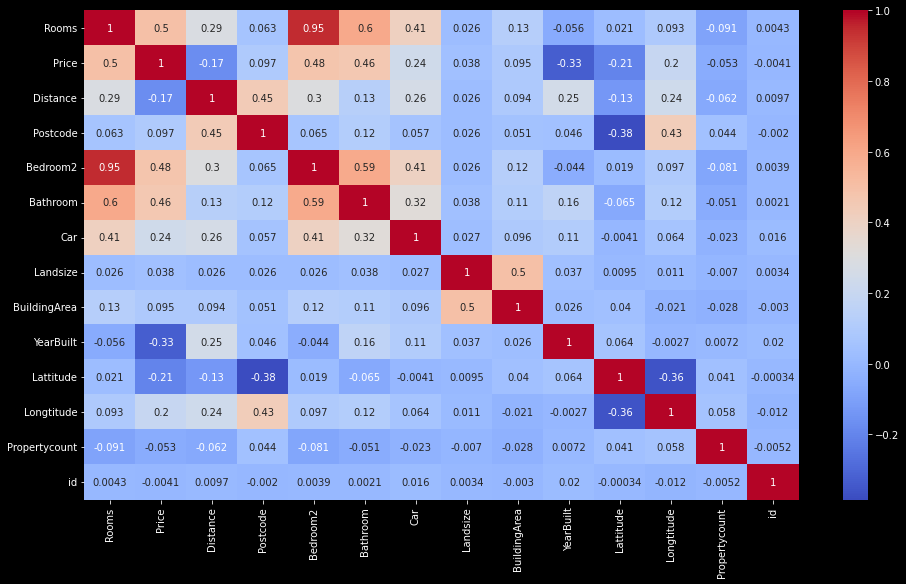

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [ ]:
df['BuildingArea'] = df.groupby('Rooms')['BuildingArea'].transform(lambda x: x.fillna(df['BuildingArea'].median()))
df['Bedroom2'] = df.groupby('Rooms')['Bedroom2'].transform(lambda x: x.fillna(df['Bedroom2'].median()))
df['Bathroom'] = df.groupby('Rooms')['Bathroom'].transform(lambda x: x.fillna(df['Bathroom'].median()))

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor, cv, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(df[X],df[y],train_size=0.8,random_state=69)

Мы готовы обучать модель и начать подбирать параметры, но можно попробовать наоборот: подобрать удобные параметры и затем обучать модель на них. Для этого я воспользовался библиотекой Hyperopt. **Стоит отметить** это времязатратный процесс (~30 минут).

Материалы по библиотеке Hyperopt:
* https://www.kaggle.com/code/ilialar/hyperparameters-tunning-with-hyperopt/notebook
* https://habr.com/ru/post/542624/
* https://towardsdatascience.com/an-example-of-hyperparameter-optimization-on-xgboost-lightgbm-and-catboost-using-hyperopt-12bc41a271e - код ниже взят отсюда

In [ ]:
from hyperopt import hp

Увеличение параметра n_estimators, увеличит точность, НО ещё существеннее увеличит время обучения. Завышенное значение используется в работе только как вариант повышение точности, в реальных условиях я бы старался не ставить выше 1000.

In [ ]:
ctb_reg_params = {
    'learning_rate':     hp.loguniform('learning_rate', -5, 0),
    'colsample_bylevel': hp.choice('colsample_bylevel', np.arange(0.3, 0.8, 0.1)),
    'l2_leaf_reg':       hp.choice('l2_leaf_reg', np.arange(1, 8, 1)),
    'max_depth':         hp.quniform('max_depth', 2, 10, 1) ,
    'n_estimators':      hp.quniform('n_estimators', 100, 2000, 1),
    'random_seed' : 69,
    'eval_metric': 'MAPE',
    'loss_function': 'MAE',
    'cat_features': cat_features
}
ctb_fit_params = {
    'early_stopping_rounds': 100,
    'verbose': False
}
ctb_para = dict()
ctb_para['reg_params'] = ctb_reg_params
ctb_para['fit_params'] = ctb_fit_params
ctb_para['loss_func' ] = lambda y, pred: mean_absolute_percentage_error(y, pred)

In [ ]:
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials

In [ ]:
class HPOpt(object):

    def __init__(self, x_train, x_val, y_train, y_val):
        self.x_train = x_train
        self.x_val  = x_val
        self.y_train = y_train
        self.y_val  = y_val

    def process(self, fn_name, space, trials, algo, max_evals):
        fn = getattr(self, fn_name)
        try:
            result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
        except Exception as e:
            return {'status': STATUS_FAIL,
                    'exception': str(e)}
        return result, trials

    def ctb_reg(self, para):
        reg = CatBoostRegressor(**para['reg_params'])
        return self.train_reg(reg, para)

    def train_reg(self, reg, para):
        reg.fit(self.x_train, self.y_train,
                eval_set=[(self.x_train, self.y_train), (self.x_val, self.y_val)],**para['fit_params'])
        pred = reg.predict(self.x_val)
        loss = para['loss_func'](self.y_val, pred)
        return {'loss': loss, 'status': STATUS_OK}

In [ ]:
obj = HPOpt(x_train, x_val, y_train, y_val)

ctb_opt = obj.process(fn_name='ctb_reg', space=ctb_para, trials=Trials(), algo=tpe.suggest, max_evals=100)

100%|██████████| 100/100 [52:11<00:00, 31.31s/it, best loss: 0.1422164031539997]


In [ ]:
ctb_opt

({'colsample_bylevel': 0,
  'l2_leaf_reg': 6,
  'learning_rate': 0.02762255133688368,
  'max_depth': 8.0,
  'n_estimators': 1992.0},
 <hyperopt.base.Trials at 0x7f519e4f1590>)

In [ ]:
from hyperopt import space_eval

In [ ]:
print(space_eval(ctb_para, ctb_opt[0]))

{'fit_params': {'early_stopping_rounds': 100, 'verbose': False}, 'loss_func': <function <lambda> at 0x7f51b313f5f0>, 'reg_params': {'cat_features': ('Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname'), 'colsample_bylevel': 0.3, 'eval_metric': 'MAPE', 'l2_leaf_reg': 7, 'learning_rate': 0.02762255133688368, 'loss_function': 'MAE', 'max_depth': 8.0, 'n_estimators': 1992.0, 'random_seed': 69}}


In [ ]:
test_full_data = Pool(data=df[X], label=df[y], cat_features=cat_features)

In [ ]:
reg_params={ 'colsample_bylevel': 0.3,
            'eval_metric': 'MAPE',
            'l2_leaf_reg': 7,
            'learning_rate': 0.02762255133688368,
            'loss_function': 'MAE',
            'max_depth': 8.0,
            'n_estimators': 1992.0,
            'random_seed': 69}

# берутся из space_eval(ctb_para, ctb_opt[0])

In [ ]:
model_test = CatBoostRegressor(**reg_params,verbose=200)
model_test.fit(test_full_data)

0:	learn: 0.4178250	total: 22.2ms	remaining: 44.3s
200:	learn: 0.1596504	total: 4.46s	remaining: 39.7s
400:	learn: 0.1441449	total: 8.9s	remaining: 35.3s
600:	learn: 0.1343751	total: 13.3s	remaining: 30.8s
800:	learn: 0.1289148	total: 17.7s	remaining: 26.4s
1000:	learn: 0.1242955	total: 22.2s	remaining: 22s
1200:	learn: 0.1204708	total: 26.8s	remaining: 17.7s
1400:	learn: 0.1175622	total: 31.3s	remaining: 13.2s
1600:	learn: 0.1150066	total: 35.9s	remaining: 8.78s
1800:	learn: 0.1127431	total: 40.6s	remaining: 4.3s
1991:	learn: 0.1111076	total: 45s	remaining: 0us


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(df[y], model_test.predict(df[X]))

0.12022252973163586

In [ ]:
model_test.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Distance,12.561489
1,Rooms,11.496334
2,Type,9.934715
3,Suburb,9.223874
4,CouncilArea,8.855118
5,Landsize,8.702261
6,Regionname,8.671365
7,BuildingArea,6.701196
8,Bathroom,5.458649
9,SellerG,4.946035


In [ ]:
#df_test['Price'] = model_test.predict(df_test[X])
test['Price'] = model_test.predict(test[X])

In [ ]:
test[['id','Price']].to_csv('submission2',index=False)

In [ ]:
pd.read_csv('submission2')

,id,Price
0,30130,8.355641e+05
1,18311,1.319492e+06
2,18934,1.231587e+06
3,1824,7.437305e+05
4,31339,7.708934e+05
...,...,...
8813,11120,1.241874e+06
8814,3950,7.331698e+05
8815,2209,7.247075e+05
8816,23872,9.260252e+05
